# **Import delle librerie**

In [1]:
#import delle librerie utili
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# **Import e lettura dei dati**

In [2]:
url_circuits = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/circuits.csv'
url_constructor_results = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/constructor_results.csv'
url_constructor_standings = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/constructor_standings.csv'
url_constructors = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/constructors.csv'
url_driver_standings = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/driver_standings.csv'
url_drivers = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/drivers.csv'
url_lap_times = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/lap_times.csv'
url_pit_stops = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/pit_stops.csv'
url_qualifying = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/qualifying.csv'
url_races = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/races.csv'
url_results = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/results.csv'
url_seasons = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/seasons.csv'
url_status = 'https://raw.githubusercontent.com/giorgio-angelo-esposito/F1WP/master/Dataset/status.csv'

circuits = pd.read_csv(url_circuits)
constructor_results = pd.read_csv(url_constructor_results)
constructor_standings = pd.read_csv(url_constructor_standings)
constructors = pd.read_csv(url_constructors)
driver_standings = pd.read_csv(url_driver_standings)
drivers = pd.read_csv(url_drivers)
lap_times = pd.read_csv(url_lap_times)
pit_stops = pd.read_csv(url_pit_stops)
qualifying = pd.read_csv(url_qualifying)
races = pd.read_csv(url_races)
results = pd.read_csv(url_results)
seasons = pd.read_csv(url_seasons)
status = pd.read_csv(url_status)

# **Tabella results**

# Analisi dei dati

In [ ]:
#visualizzazione dei dati
print(results)

#visualizzazione colonne
print(results.columns)

#conteggio dei dati
results.count()

       resultId  raceId  driverId  ...  fastestLapTime fastestLapSpeed  statusId
0             1      18         1  ...        1:27.452         218.300         1
1             2      18         2  ...        1:27.739         217.586         1
2             3      18         3  ...        1:28.090         216.719         1
3             4      18         4  ...        1:28.603         215.464         1
4             5      18         5  ...        1:27.418         218.385         1
...         ...     ...       ...  ...             ...             ...       ...
25394     25400    1073       815  ...        1:26.419         219.993         5
25395     25401    1073       849  ...        1:29.293         212.912         3
25396     25402    1073       841  ...        1:29.442         212.557         6
25397     25403    1073       847  ...        1:30.647         209.732         6
25398     25404    1073         8  ...        1:29.698         211.951        23

[25399 rows x 18 columns]
I

resultId           25399
raceId             25399
driverId           25399
constructorId      25399
number             25399
grid               25399
position           25399
positionText       25399
positionOrder      25399
points             25399
laps               25399
time               25399
milliseconds       25399
fastestLap         25399
rank               25399
fastestLapTime     25399
fastestLapSpeed    25399
statusId           25399
dtype: int64

# Relazioni tra i dati

<Figure size 936x936 with 0 Axes>

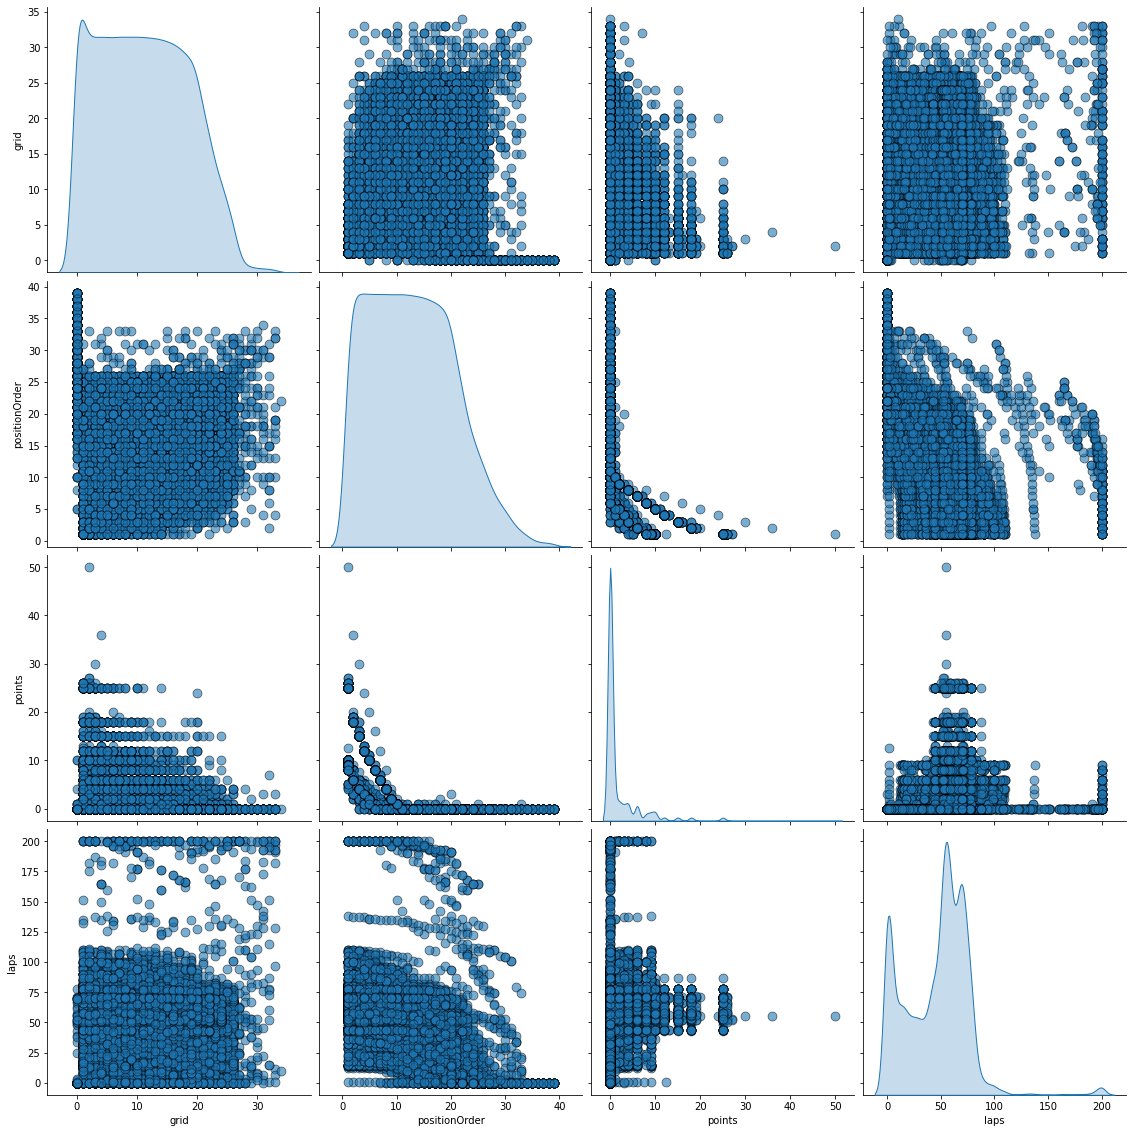

In [3]:
results_copy = results.copy()
results_copy.drop(columns=['resultId','raceId','driverId','statusId','number','position','positionText','time','milliseconds','fastestLap','fastestLapTime','fastestLapSpeed','rank'],inplace=True)
results_copy = pd.merge(results_copy,constructors,on='constructorId')
results_copy.drop(columns=['constructorId','constructorRef','nationality','url'],inplace=True)
plt.figure(figsize=(13,13))

sns.pairplot(results_copy,diag_kind='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},height=4)
plt.savefig('correlation_matrix_results.png',dpi = 300)
plt.show()

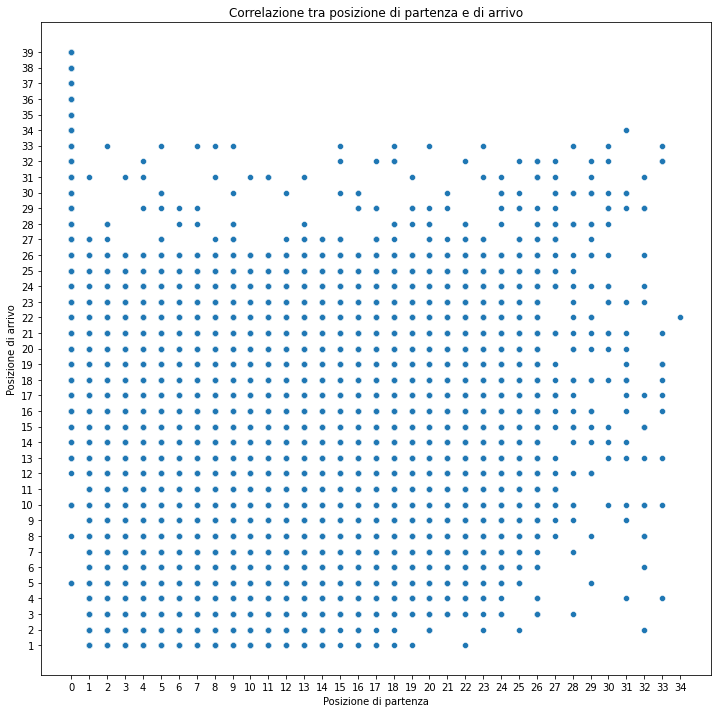

In [ ]:
plt.figure(figsize=(12,12))

sns.scatterplot(data=results_copy,x = 'grid', y = 'positionOrder')

plt.xticks(results['grid'].unique())
plt.yticks(results['positionOrder'].unique())

plt.xlabel('Posizione di partenza')
plt.ylabel('Posizione di arrivo')
plt.title('Correlazione tra posizione di partenza e di arrivo')
plt.savefig('grid_pOrder_correlation')
plt.show()

In [70]:
grid_win = results_copy.copy()
grid_win['Total'] = 1

plt.figure(figsize=(13,13))

grid_win = grid_win.groupby(['grid','positionOrder']).count()['Total']
grid_win



0
positionOrder
5       2
8       1
10      5
12      1
13      4
14      2
15      4
16     10
17     23
18     25
19     23
20     32
21     48
22     57
23     47
24     43
25     91
26    108
27    228
28    195
29    158
30    135
31     99
32     65
33     53
34     45
35     29
36     18
37     17
38     17
39     13
Name: Total, dtype: int64
1
positionOrder
1     446
2     151
3      70
4      44
5      21
6      19
7      13
8      18
9      16
10     10
11     16
12     26
13     20
14     24
15     27
16     26
17     20
18     24
19     18
20     12
21     13
22     10
23      6
24      3
25      7
26      4
27      3
31      1
Name: Total, dtype: int64
2
positionOrder
1     253
2     212
3     113
4      56
5      40
6      16
7      32
8      17
9      19
10     10
11     23
12     18
13     20
14     20
15     20
16     38
17     24
18     21
19     19
20     24
21     17
22     13
23      8
24     11
25      6
26      4
27      1
28      2
33      1
Name: Total, dtype: 

KeyError: ignored

<Figure size 936x936 with 0 Axes>

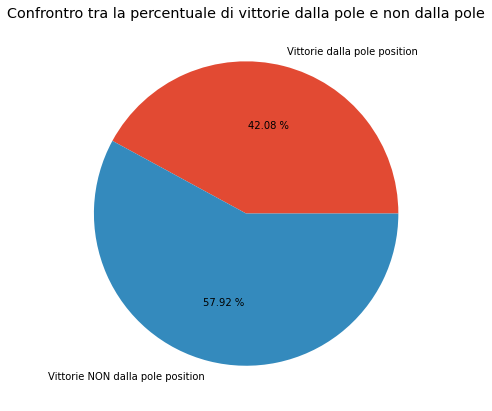

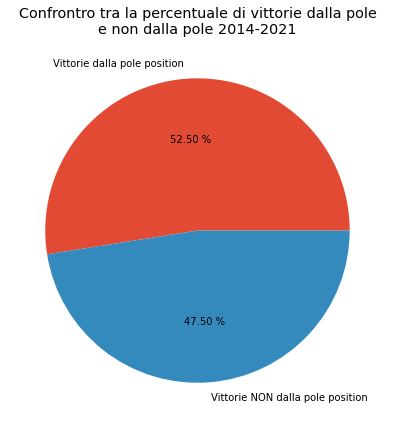

In [19]:
#otteniamo il numero di piloti che hanno vinto partendo dalla prima posizione
winner_from_pole = results.loc[(results['grid'] == 1) & (results['positionOrder'] == 1)].count()[0]

#otteniamo il numero di piloti che hanno vinto partendo da una posizione diversa dalla prima
winner_not_from_pole = results.loc[(results['grid'] != 1) & (results['positionOrder'] == 1)].count()[0]

#creaimo un pie chart con questi valori
labels = ['Vittorie dalla pole position','Vittorie NON dalla pole position'] #label da utilizzare 

plt.figure(figsize=(7,7)) #dimensioni del grafico
plt.style.use('ggplot') #stile del grafico
plt.pie([winner_from_pole,winner_not_from_pole],labels=labels,autopct= '%.2f %%') #creazione del grafico
plt.title('Confrontro tra la percentuale di vittorie dalla pole e non dalla pole') #titolo del grafico
plt.savefig('Starting_position',dpi = 300) #salviamo il grafico
plt.show() #mostriamo il grafico
print('\n')
#uniamo i dataset results e races per ottenere l'anno in cui si sono svolte le gare
results_and_races = pd.merge(results, races, on='raceId')

#otteniamo il numero di piloti che hanno vinto partendo dalla prima posizione dal 2014 al 2021
winner_from_pole_from_2014 = results_and_races.loc[(results_and_races['grid'] == 1) & (results_and_races['positionOrder'] == 1) & (results_and_races['year'] >= 2014)].count()[0]

#otteniamo il numero di piloti che hanno vinto partendo da una posizione diversa dalla prima dal 2014 al 2021
winner_not_from_pole_from_2014 = results_and_races.loc[(results_and_races['grid'] != 1) & (results_and_races['positionOrder'] == 1) & (results_and_races['year'] >= 2014)].count()[0]


#creaimo un pie chart con questi valori
labels = ['Vittorie dalla pole position','Vittorie NON dalla pole position'] #label da utilizzare 

plt.figure(figsize=(7,7)) #dimensioni del grafico
plt.style.use('ggplot') #stile del grafico
plt.pie([winner_from_pole_from_2014,winner_not_from_pole_from_2014],labels=labels,autopct= '%.2f %%') #creazione del grafico
plt.title('Confrontro tra la percentuale di vittorie dalla pole\ne non dalla pole 2014-2021') #titolo del grafico
plt.savefig('Starting_position_from_2014',dpi = 300) #salviamo il grafico
plt.show() #mostriamo il grafico

# **Tabella races**

# Analisi dei dati

In [ ]:
#visualizzazione dei dati
print(races)

#visualizziamo le colonne
print(races.columns)

#conteggio dei dati
races.count()

      raceId  year  ...      time                                                url
0          1  2009  ...  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...
1          2  2009  ...  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2          3  2009  ...  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3          4  2009  ...  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4          5  2009  ...  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...      ...   ...  ...       ...                                                ...
1075    1092  2022  ...  05:10:00  https://en.wikipedia.org/wiki/2022_Japanese_Gr...
1076    1093  2022  ...  19:00:00  https://en.wikipedia.org/wiki/2022_United_Stat...
1077    1094  2022  ...  19:00:00  https://en.wikipedia.org/wiki/2022_Mexican_Gra...
1078    1095  2022  ...  17:00:00  https://en.wikipedia.org/wiki/2022_S%C3%A3o_Pa...
1079    1096  2022  ...  13:00:00  https://en.wikipedia.org/wiki/

raceId       1080
year         1080
round        1080
circuitId    1080
name         1080
date         1080
time         1080
url          1080
dtype: int64

# **Tabella qualifying**

# Analisi tabella

In [ ]:
#visualizzazione dei dati
print(qualifying)

#visualizzazione colonne
print(qualifying.columns)

#conteggio dei dati
qualifying.count()

#controllo dei dati mancanti
qualifying[qualifying.isnull().any(1)] 

      qualifyId  raceId  driverId  ...        q1        q2        q3
0             1      18         1  ...  1:26.572  1:25.187  1:26.714
1             2      18         9  ...  1:26.103  1:25.315  1:26.869
2             3      18         5  ...  1:25.664  1:25.452  1:27.079
3             4      18        13  ...  1:25.994  1:25.691  1:27.178
4             5      18         2  ...  1:25.960  1:25.518  1:27.236
...         ...     ...       ...  ...       ...       ...       ...
9130       9171    1073       849  ...  1:24.338        \N        \N
9131       9172    1073       847  ...  1:24.423        \N        \N
9132       9173    1073         8  ...  1:24.779        \N        \N
9133       9174    1073       854  ...  1:24.906        \N        \N
9134       9175    1073       853  ...  1:25.685        \N        \N

[9135 rows x 9 columns]
Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position', 'q1', 'q2', 'q3'],
      dtype='object')


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
3880,3882,114,23,3,4,1,1:15.259,NaN,NaN
3881,3883,114,8,1,6,2,1:15.295,NaN,NaN
3882,3884,114,31,3,3,3,1:15.415,NaN,NaN
3883,3885,114,15,4,7,4,1:15.500,NaN,NaN
3884,3886,114,30,6,1,5,1:15.644,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8669,8710,1046,825,210,20,16,0:54.705,NaN,NaN
8670,8711,1046,849,3,6,17,0:54.796,NaN,NaN
8671,8712,1046,851,3,89,18,0:54.892,NaN,NaN
8672,8713,1046,8,51,7,19,0:54.963,NaN,NaN


# **Tabella driver standings**

# Analisi tabella

In [ ]:
#visualizzazione dei dati
print(driver_standings)

#visualizza colonne
print(driver_standings.columns)

#conteggio dei dati
driver_standings.count()

#effetuato controllo per capire cosa significa - per raceId = 1074
#driver_standings.loc[driver_standings['raceId'] == 1073]

       driverStandingsId  raceId  driverId  points  position positionText  wins
0                      1      18         1    10.0         1            1     1
1                      2      18         2     8.0         2            2     0
2                      3      18         3     6.0         3            3     0
3                      4      18         4     5.0         4            4     0
4                      5      18         5     4.0         5            5     0
...                  ...     ...       ...     ...       ...          ...   ...
33389              70776    1074       840     0.0        16            -     0
33390              70777    1074       852     0.0        17            -     0
33391              70778    1074       830     0.0        18            -     0
33392              70779    1074        20     0.0        19            -     0
33393              70780    1074       855     0.0        20            -     0

[33394 rows x 7 columns]
Index(['driver

driverStandingsId    33394
raceId               33394
driverId             33394
points               33394
position             33394
positionText         33394
wins                 33394
dtype: int64


# Relazioni tra i dati

<Figure size 936x936 with 0 Axes>

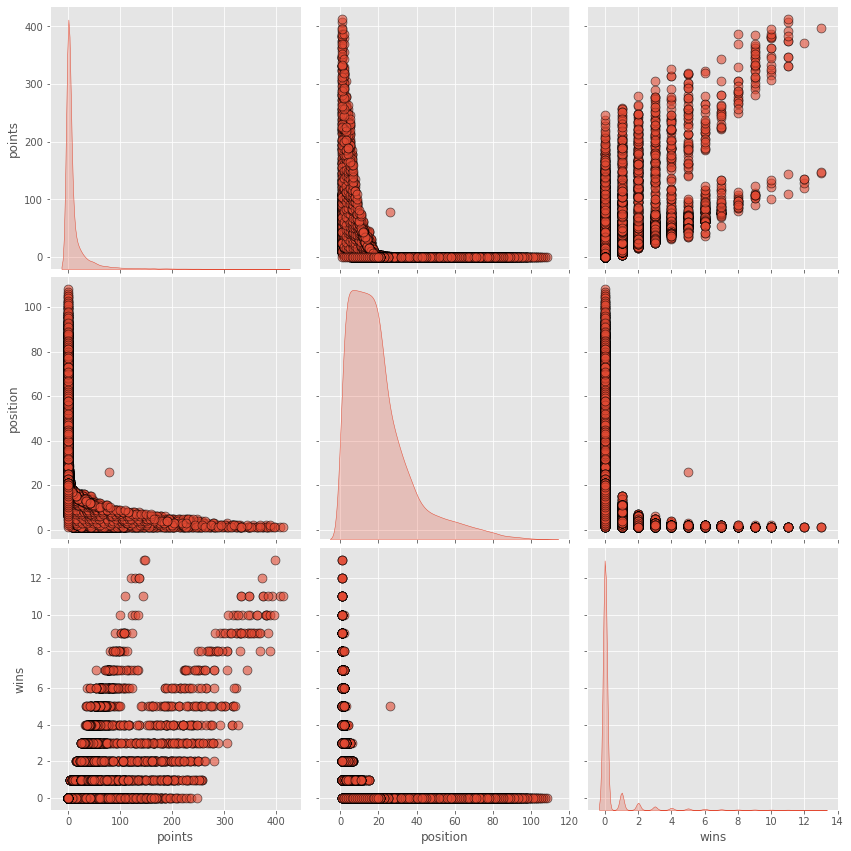

In [72]:
driver_standings_copy = driver_standings.copy()
driver_standings_copy.drop(columns=['driverStandingsId','raceId','driverId','positionText'],inplace=True)

plt.figure(figsize=(13,13))

sns.pairplot(driver_standings_copy,diag_kind='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},height=4)
plt.savefig('correlation_matrix_driver_standings.png',dpi = 300)
plt.show()

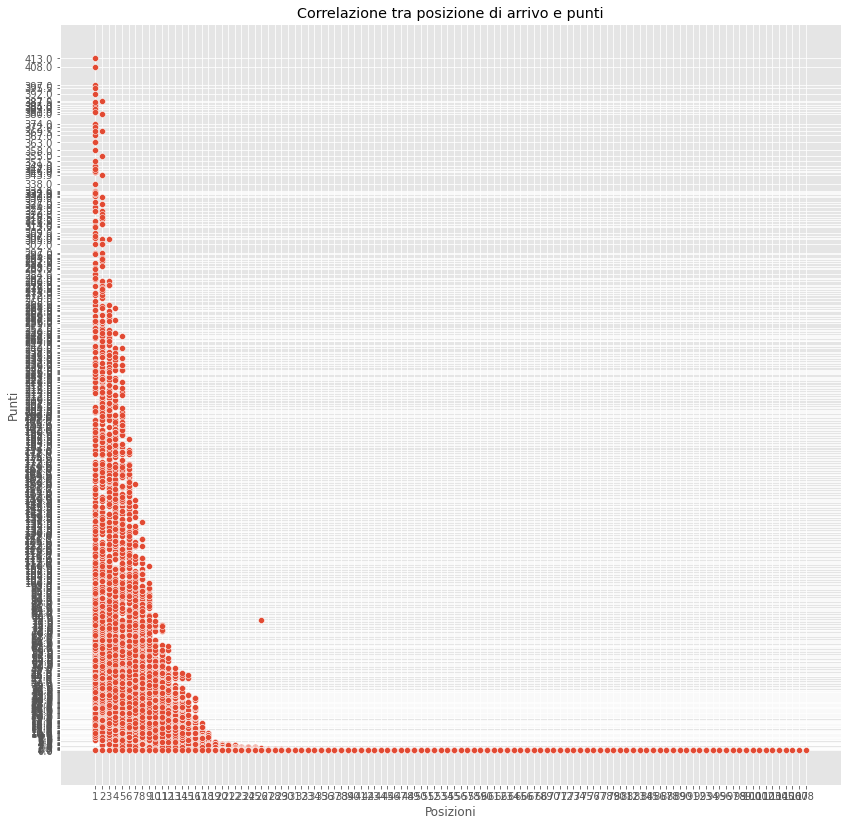

In [73]:
plt.figure(figsize=(14,14))

sns.scatterplot(data=driver_standings_copy,x = 'position', y = 'points')

plt.xticks(driver_standings_copy['position'].unique())
plt.yticks(driver_standings_copy['points'].unique())

plt.xlabel('Posizioni') 
plt.ylabel('Punti') 
plt.title('Correlazione tra posizione di arrivo e punti') 
plt.savefig('position_points_driver_standings_correlation') 
plt.show()


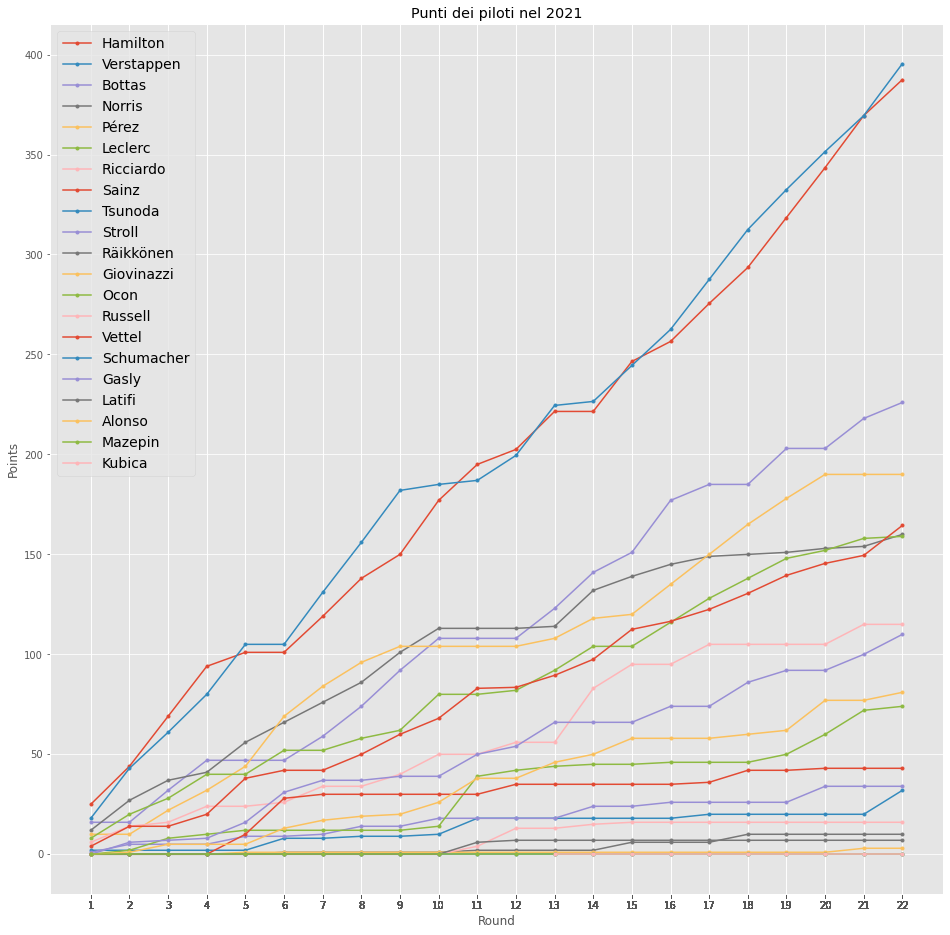

In [ ]:
#unione di driver_standings e races sul raceId, salvato in un nuovo dataframe driver_points
driver_points = pd.merge(driver_standings,races,on='raceId')
#unione di driver_points e drivers su driverId
driver_points = pd.merge(driver_points,drivers, on='driverId')
#otteniamo i dati relativi al campionato 2021
driver_points_2021 = driver_points.loc[driver_points['year'] == 2021]
#ordiniamoli per numero di gara e posizione
driver_points_2021 = driver_points_2021.sort_values(['round','position'])
#estrapoliamo i cognomi dei piloti
surname = driver_points_2021['surname'].unique()
#settiamo la dimensione del grafico
plt.figure(figsize=(16,16))
#plotting dei dati
for driver in driver_points_2021['driverId'].unique():
  i = driver_points_2021.loc[driver_points_2021['driverId'] == driver]
  plt.plot(i['round'],i['points'], marker = '.')

#assegniamo la spaziatura sull'asse delle x
plt.xticks(driver_points_2021['round'][::1])
#assegniamo una label all'asse delle x
plt.xlabel('Round')
#assegniamo una label all'asse delle y
plt.ylabel('Points')
#creiamo la legenda
plt.legend(surname, prop={'size': 14})
#diamo un titolo al grafico
plt.title('Punti dei piloti nel 2021')
#salviamo il grafico
plt.savefig('Classifica_campionato_piloti_2021',dpi = 300)
#mostriamo il grafico
plt.show()

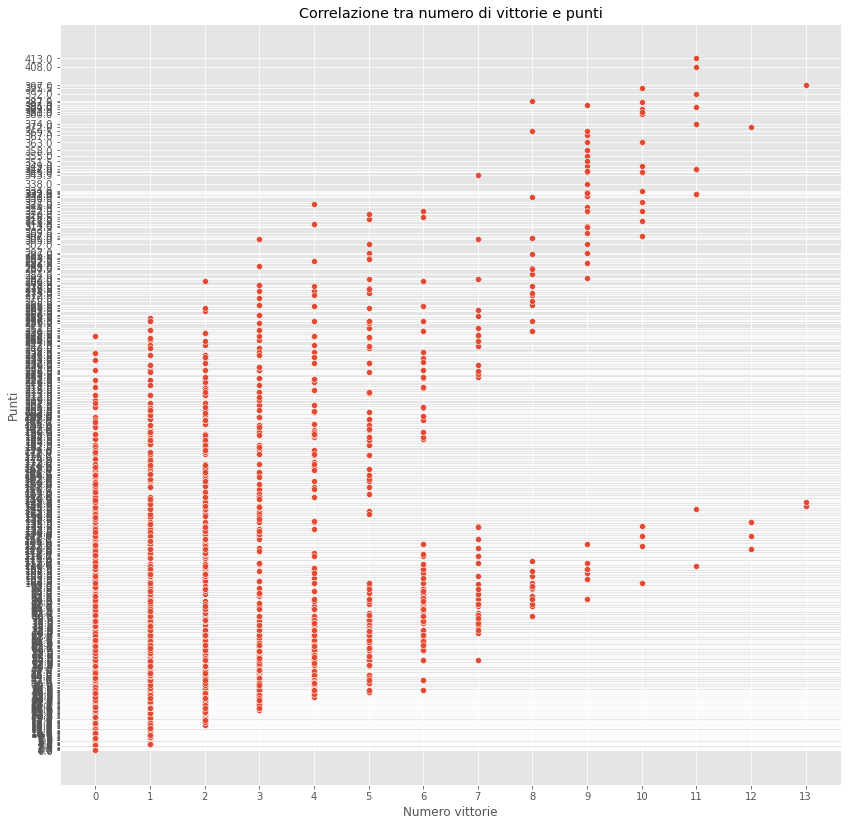

In [74]:
plt.figure(figsize=(14,14))

sns.scatterplot(data=driver_standings_copy,x = 'wins', y = 'points')

plt.xticks(driver_standings_copy['wins'].unique())
plt.yticks(driver_standings_copy['points'].unique())

plt.xlabel('Numero vittorie') 
plt.ylabel('Punti') 
plt.title('Correlazione tra numero di vittorie e punti') 
plt.savefig('wins_points_driver_standings_correlation') 
plt.show()

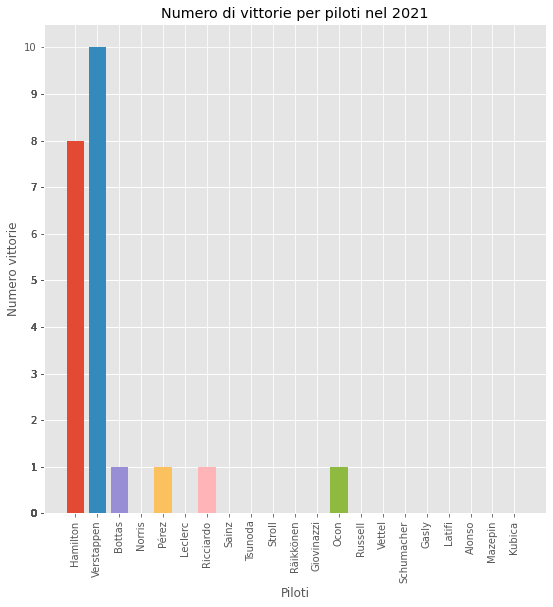

In [ ]:
#settiamo le dimensioni del grafico
plt.figure(figsize=(9,9))
#plottiamo i dati
for driver in driver_points_2021['driverId'].unique():
  i = driver_points_2021.loc[driver_points_2021['driverId'] == driver]
  plt.bar(i['surname'],i['wins'])

#settiamo la label dell'asse delle x
plt.xlabel('Piloti')
#settiamo la label dell'asse delle y
plt.ylabel('Numero vittorie')
#settiamo lo spazio sull'asse delle y
plt.yticks(driver_points_2021['wins'][::1])
#rotiamo di 90° i nomi dei team presenti nel grafico
plt.xticks(rotation = 90)
#settiamo il titolo del grafico
plt.title('Numero di vittorie per piloti nel 2021')
#salviamo il grafico
plt.savefig('Vittorie_per_piloti_2021.png',dpi= 300)
#mostriamo il grafico
plt.show()

# **Tabella circuits**

In [ ]:
#visualizzazione dei dati
print(circuits)

#visualizza colonne
print(circuits.columns)

#conteggio dei dati
circuits.count()

    circuitId  ...                                                url
0           1  ...  http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1           2  ...  http://en.wikipedia.org/wiki/Sepang_Internatio...
2           3  ...  http://en.wikipedia.org/wiki/Bahrain_Internati...
3           4  ...  http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4           5  ...         http://en.wikipedia.org/wiki/Istanbul_Park
..        ...  ...                                                ...
74         75  ...  http://en.wikipedia.org/wiki/Algarve_Internati...
75         76  ...       http://en.wikipedia.org/wiki/Mugello_Circuit
76         77  ...  http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77         78  ...  http://en.wikipedia.org/wiki/Losail_Internatio...
78         79  ...  https://en.wikipedia.org/wiki/Miami_Internatio...

[79 rows x 9 columns]
Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')


circuitId     79
circuitRef    79
name          79
location      79
country       79
lat           79
lng           79
alt           79
url           79
dtype: int64

# Relazioni tra i dati

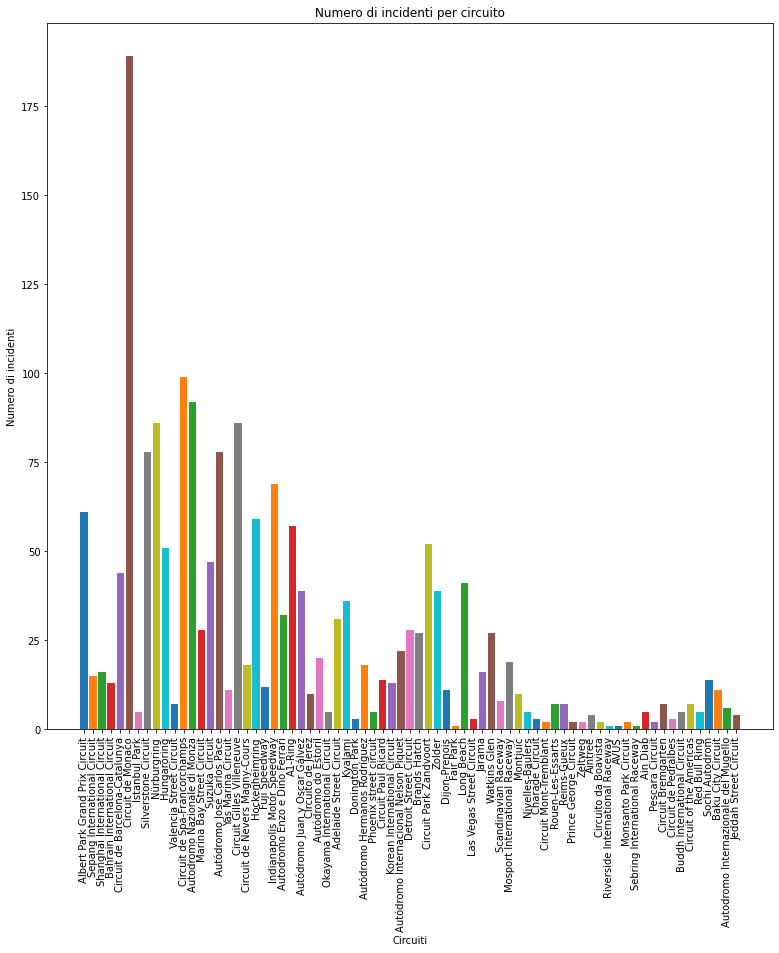

In [ ]:
#unione di races e circuits e salvataggio del risultato in un dataframe dangerous_circuits
dangerous_circuits = pd.merge(races,circuits, on = 'circuitId')
#cancellazione di colonne
dangerous_circuits.drop(labels=['url_x','url_y'],axis=1, inplace=True)
#rinominazione di colonne
dangerous_circuits.rename({'name_x':'GP_name','name_y':'circuitsName'},axis= 1, inplace=True)
#unione di dangerous_circuits e results
dangerous_circuits = pd.merge(dangerous_circuits, results, on = 'raceId')
#cancellazione di colonne
dangerous_circuits.drop(labels=['circuitRef','GP_name','number','grid','constructorId','country','driverId','resultId','time_x','location','round','date','alt','lat','lng','position','positionText','positionOrder','points','laps','time_y','milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed'],axis=1, inplace= True)
#settiamo la dimensione del grafico
plt.figure(figsize=(13,13))
#plottiamo i dati
for circuit in dangerous_circuits['circuitsName'].unique():
  i = dangerous_circuits.loc[(dangerous_circuits['circuitsName']== circuit) & ((dangerous_circuits['statusId'] == 3) | (dangerous_circuits['statusId'] == 4))]
  plt.bar(i['circuitsName'],i['statusId'].count())
#rotiamo gli indici delle barre del grafico
plt.xticks(rotation = 90)
#assegniamo una label all'asse delle x
plt.xlabel('Circuiti')
#assegniamo una label all'asse delle y
plt.ylabel('Numero di incidenti')
#assegniamo un titolo
plt.title('Numero di incidenti per circuito')
#salviamo il grafico
plt.savefig('incidenti_per_circuito',dpi = 300)
#mostriamo il grafico
plt.show()

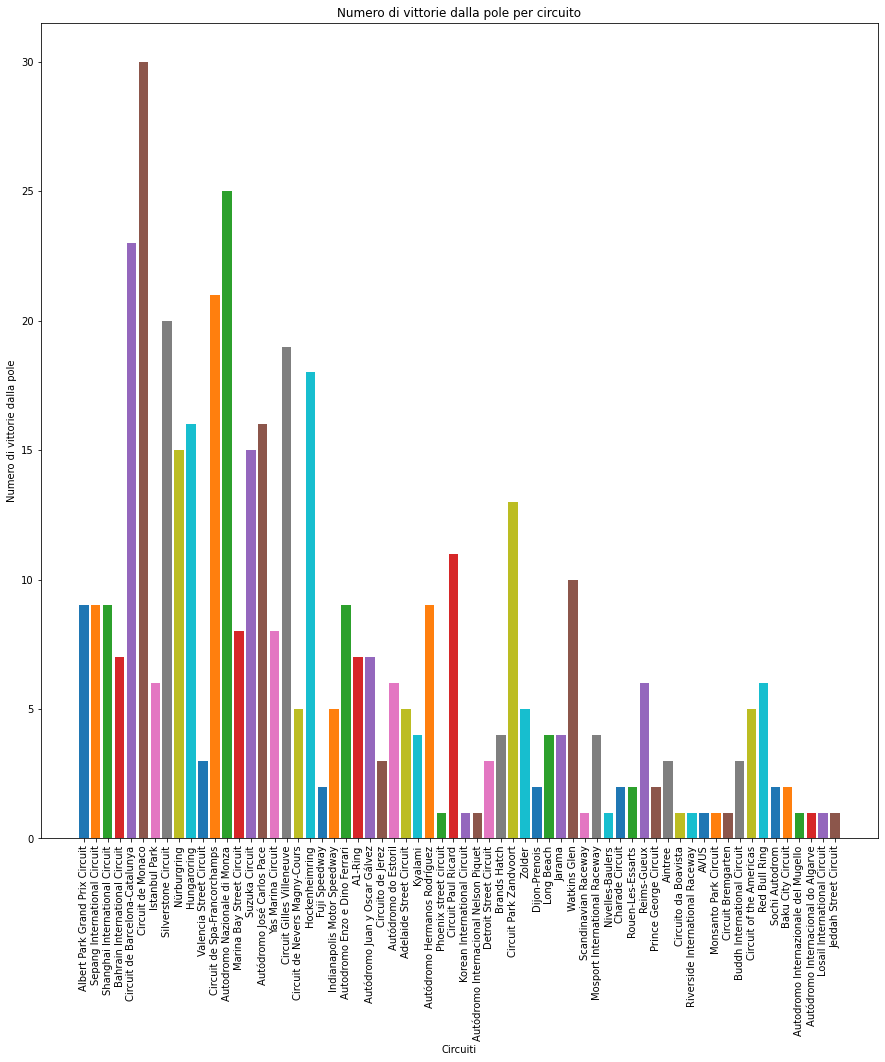

In [ ]:
#unione di races e circuit, risultato salvato in un nuovo dataframe chiamato winner_from_pole_circuits
winner_from_pole_circuits = pd.merge(races,circuits, on = 'circuitId')
#cancellazione di colonne non utili
winner_from_pole_circuits.drop(columns=['url_x','url_y','date','time','circuitRef','location','country','lat','lng','alt','name_x'],inplace=True)
#unione di winner_from_pole_circuits e results
winner_from_pole_circuits = pd.merge(winner_from_pole_circuits,results,on='raceId')
#rinominiamo l'intestazione della colonna del nome del circuito
winner_from_pole_circuits.rename({'name_y':'circuitName'},axis=1,inplace=True)
#cancellazione di colonne non utili
winner_from_pole_circuits.drop(columns=['driverId','resultId','constructorId','number','position','positionText','points','laps','time','milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed','statusId'],inplace=True)

#settiamo la dimensione del grafico
plt.figure(figsize=(15,15))
#plottiamo i dati
for circuit in winner_from_pole_circuits['circuitName'].unique():
  i = winner_from_pole_circuits.loc[(winner_from_pole_circuits['circuitName'] == circuit) & (winner_from_pole_circuits['grid']==1) & (winner_from_pole_circuits['positionOrder']==1)]
  plt.bar(i['circuitName'],i['positionOrder'].count())

#assegniamo una label all'asse delle x
plt.xlabel('Circuiti')
#assegniamo una label all'asse delle y
plt.ylabel('Numero di vittorie dalla pole')
#assegniamo un titolo al grafico
plt.title('Numero di vittorie dalla pole per circuito')
#rotiamo gli identificativi delle barre
plt.xticks(rotation= 90)
#salviamo il grafico
plt.savefig('vittorie_da_pole_circuito',dpi=300)
#mostriamo il grafico
plt.show()


# **Tabella constructor**

# Analisi dei dati

In [ ]:
#visualizzazione dei dati
print(constructors)

#visualizza colonne
print(constructors.columns)

#conteggio dei dati
constructors.count()

#visualizzazione indici mancanti
constructors.constructorId.unique()

       resultId  raceId  driverId  ...  fastestLapTime fastestLapSpeed  statusId
0             1      18         1  ...        1:27.452         218.300         1
1             2      18         2  ...        1:27.739         217.586         1
2             3      18         3  ...        1:28.090         216.719         1
3             4      18         4  ...        1:28.603         215.464         1
4             5      18         5  ...        1:27.418         218.385         1
...         ...     ...       ...  ...             ...             ...       ...
25394     25400    1073       815  ...        1:26.419         219.993         5
25395     25401    1073       849  ...        1:29.293         212.912         3
25396     25402    1073       841  ...        1:29.442         212.557         6
25397     25403    1073       847  ...        1:30.647         209.732         6
25398     25404    1073         8  ...        1:29.698         211.951        23

[25399 rows x 18 columns]
I

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  21,  20,  22,  24,  25,  26,  27,
        29,  28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  40,  39,
        41,  42,  44,  45,  46,  47,  23,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59, 204,  60,  61,  62, 182,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74, 202,  75,  76,
       203,  80,  77,  78,  79,  81,  82,  83,  84, 180, 200, 199, 201,
        85, 187,  86, 198, 196, 191, 167, 197, 189, 183, 194, 190,  89,
       170, 195, 184, 176, 172, 193,  90, 181, 188, 192,  91, 185, 186,
        93,  94,  92,  95,  96,  97, 177, 179, 173,  98,  99, 175,  87,
       100, 174, 178, 101, 102, 103, 104, 105, 106, 171, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       169, 123, 168, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 14

# **Tabella constructor results**

# Analisi della tabella

In [ ]:
#visualizzazione dei dati
print(constructor_results)

#visualizza colonne
print(constructor_results.columns)

#conteggio dei dati
constructor_results.count()

#controllo dei valori all'interno della colonna status
print(constructor_results.loc[constructor_results['status'] != '\\N'])

#controllo dei constructorsId mancanti
constructor_standings.loc[(constructor_standings.constructorId == 43) & (constructor_standings.constructorId == 165) & (constructor_standings.constructorId == 212)]

       constructorResultsId  raceId  constructorId  points status
0                         1      18              1    14.0     \N
1                         2      18              2     8.0     \N
2                         3      18              3     9.0     \N
3                         4      18              4     5.0     \N
4                         5      18              5     2.0     \N
...                     ...     ...            ...     ...    ...
11945                 16445    1073            214     6.0     \N
11946                 16446    1073            117     0.0     \N
11947                 16447    1073            210     0.0     \N
11948                 16448    1073              3     0.0     \N
11949                 16449    1073             51     0.0     \N

[11950 rows x 5 columns]
Index(['constructorResultsId', 'raceId', 'constructorId', 'points', 'status'], dtype='object')
     constructorResultsId  raceId  constructorId  points status
185                   1

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins


# **Tabella constructor standings**

# Analisi dei dati

In [ ]:
#visualizzazione dei dati
print(constructor_standings)

#visualizza colonne
print(constructor_standings.columns)

#conteggio dei dati
constructor_standings.count()

#controllo dei constructorsId mancanti
constructor_standings.loc[(constructor_standings.constructorId == 43) & (constructor_standings.constructorId == 165) & (constructor_standings.constructorId == 212)]

       constructorStandingsId  raceId  ...  positionText  wins
0                           1      18  ...             1     1
1                           2      18  ...             3     0
2                           3      18  ...             2     0
3                           4      18  ...             4     0
4                           5      18  ...             5     0
...                       ...     ...  ...           ...   ...
12711                   27938    1074  ...             -     0
12712                   27939    1074  ...             -     0
12713                   27940    1074  ...             -     0
12714                   27941    1074  ...             -     0
12715                   27942    1074  ...             -     0

[12716 rows x 7 columns]
Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins'],
      dtype='object')


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins


# Relazioni tra i dati

<Figure size 936x936 with 0 Axes>

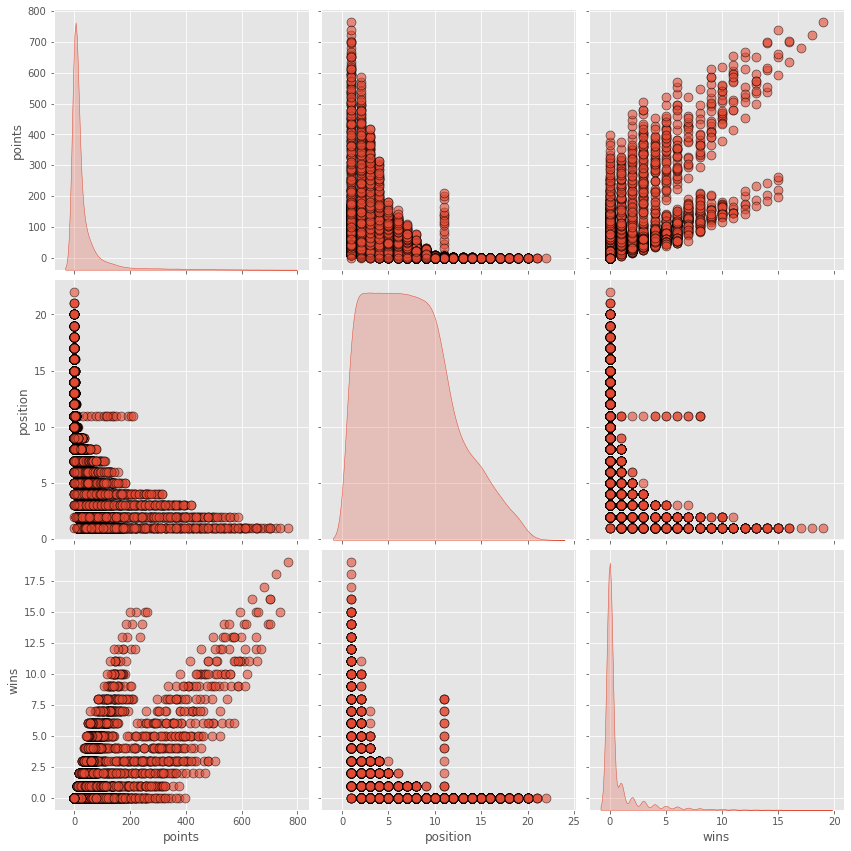

In [75]:
constructor_standings_copy = constructor_standings.copy()
constructor_standings_copy.drop(columns=['constructorStandingsId','raceId','constructorId','positionText'],inplace=True)

plt.figure(figsize=(13,13))

sns.pairplot(constructor_standings_copy,diag_kind='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},height=4)
plt.savefig('correlation_matrix_constructor_standings.png',dpi = 300)
plt.show()

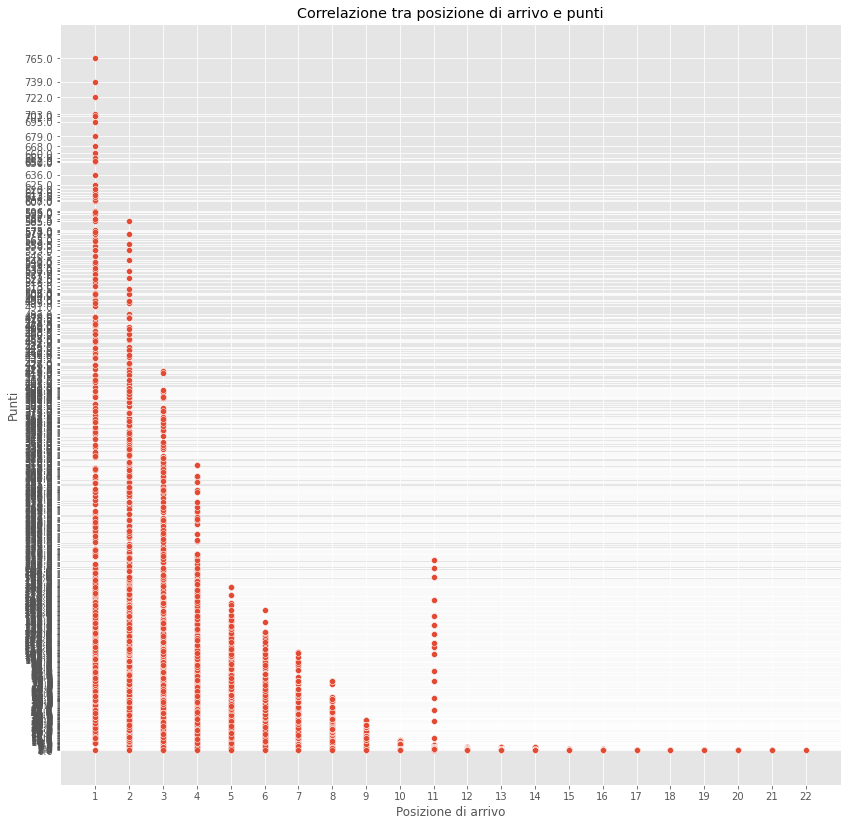

In [76]:
plt.figure(figsize=(14,14))

sns.scatterplot(data=constructor_standings_copy,x = 'position', y = 'points')

plt.xticks(constructor_standings_copy['position'].unique())
plt.yticks(constructor_standings_copy['points'].unique())

plt.xlabel('Posizione di arrivo') 
plt.ylabel('Punti') 
plt.title('Correlazione tra posizione di arrivo e punti') 
plt.savefig('position_wins_constructor_standings_correlation') 
plt.show()

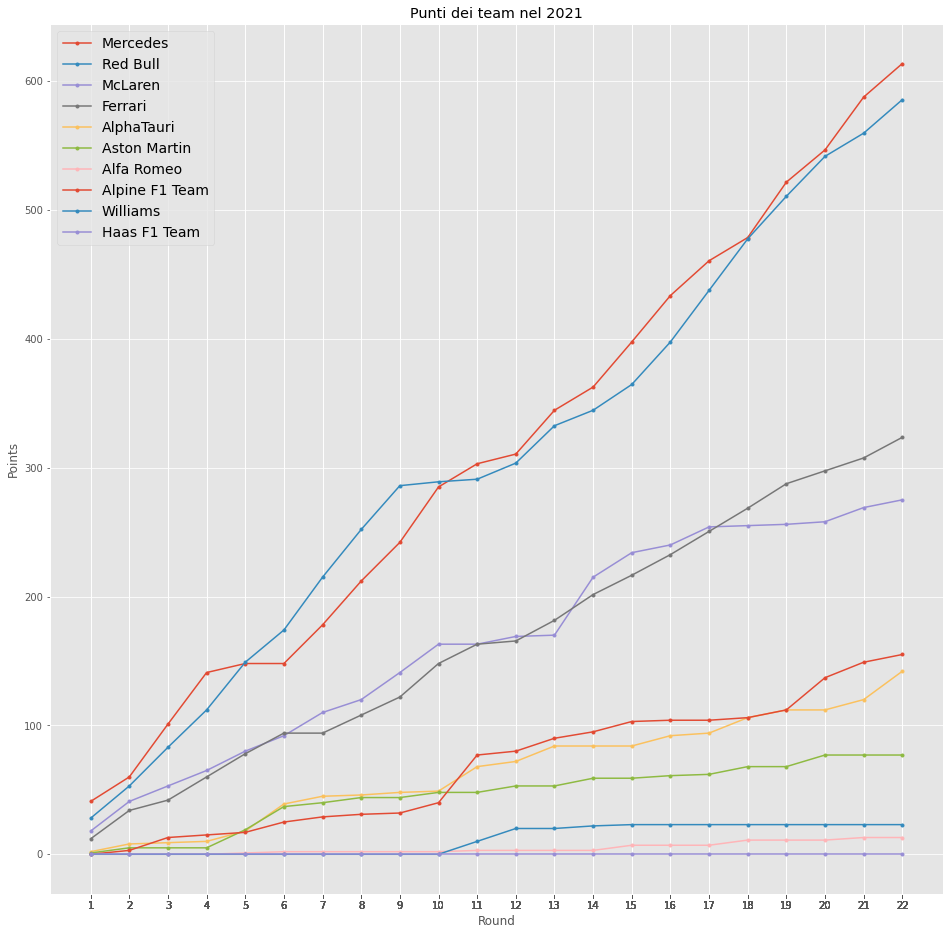

In [ ]:
#unione di constructor_standings e races sul raceId, salvato in un nuovo dataframe constructor_points
constructor_points = pd.merge(constructor_standings,races,on='raceId')
#unione di constructor_points e constructors su constructorId
constructor_points = pd.merge(constructor_points,constructors, on='constructorId')
#otteniamo i dati relativi al campionato 2021
constructor_points_2021 = constructor_points.loc[constructor_points['year'] == 2021]
#ordiniamoli per numero di gara e posizione
constructor_points_2021 = constructor_points_2021.sort_values(['round','position'])
#rinominiamo colonne con nomi simili
constructor_points_2021.rename({'name_x':'GP_Name','name_y':'team_name'},axis=1, inplace=True)

#estrapoliamo i nomi dei team
team_name = constructor_points_2021['team_name'].unique()
#settiamo la dimensione del grafico
plt.figure(figsize=(16,16))
#plotting dei dati
for team in constructor_points_2021['constructorId'].unique():
  i = constructor_points_2021.loc[constructor_points_2021['constructorId'] == team]
  plt.plot(i['round'],i['points'], marker = '.')

#assegniamo la spaziatura sull'asse delle x
plt.xticks(constructor_points_2021['round'][::1])
#assegniamo una label all'asse delle x
plt.xlabel('Round')
#assegniamo una label all'asse delle y
plt.ylabel('Points')
#creiamo la legenda
plt.legend(team_name, prop={'size': 14})
#diamo un titolo al grafico
plt.title('Punti dei team nel 2021')
#salviamo il grafico
plt.savefig('Classifica_campionato_team_2021',dpi = 300)
#mostriamo il grafico
plt.show()

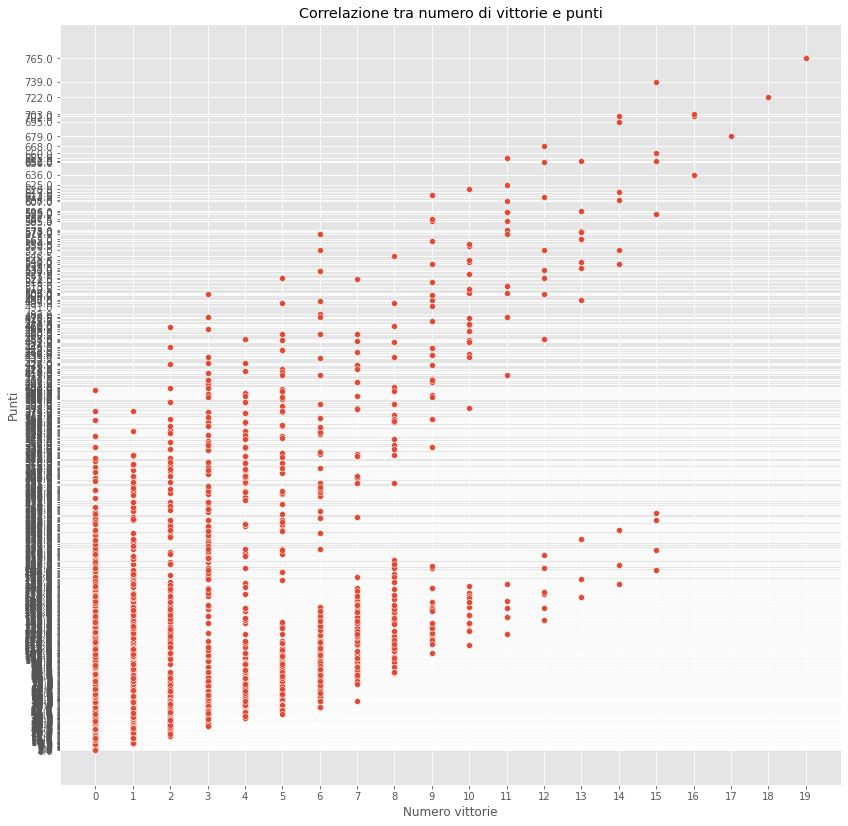

In [77]:
plt.figure(figsize=(14,14))

sns.scatterplot(data=constructor_standings_copy,x = 'wins', y = 'points')

plt.xticks(constructor_standings_copy['wins'].unique())
plt.yticks(constructor_standings_copy['points'].unique())

plt.xlabel('Numero vittorie') 
plt.ylabel('Punti') 
plt.title('Correlazione tra numero di vittorie e punti') 
plt.savefig('wins_points_constructor_standings_correlation') 
plt.show()

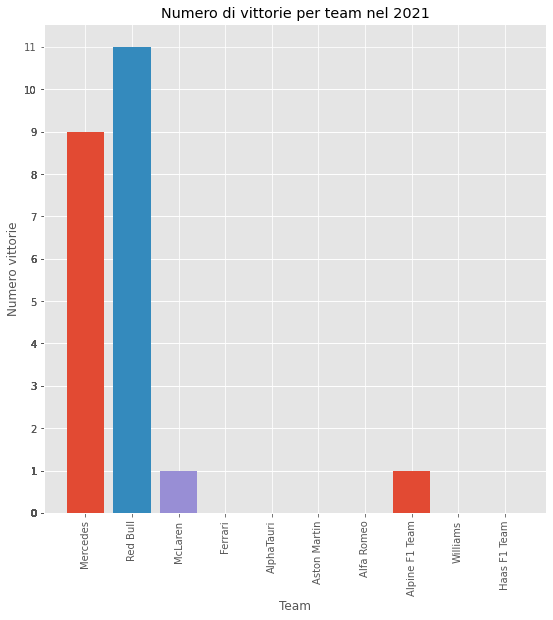

In [ ]:
#settiamo le dimensioni del grafico
plt.figure(figsize=(9,9))
#plottiamo i dati
for team in constructor_points_2021['constructorId'].unique():
  i = constructor_points_2021.loc[constructor_points_2021['constructorId'] == team]
  plt.bar(i['team_name'],i['wins'])

#settiamo la label dell'asse delle x
plt.xlabel('Team')
#settiamo la label dell'asse delle y
plt.ylabel('Numero vittorie')
#settiamo lo spazio sull'asse delle y
plt.yticks(constructor_points_2021['wins'][::1])
#rotiamo di 90° i nomi dei team presenti nel grafico
plt.xticks(rotation = 90)
#settiamo il titolo del grafico
plt.title('Numero di vittorie per team nel 2021')
#salviamo il grafico
plt.savefig('Vittorie_per_team_2021.png',dpi= 300)
#mostriamo il grafico
plt.show()

# **Tabella lap times**

# Analisi dei dati

In [ ]:
#visualizzazione dei dati
print(lap_times)

#visualizza colonne
print(lap_times.columns)

#conteggio dei dati
lap_times.count()

#controllo dei tempi dei piloti ritirati: come esempio si è scelto il pilota Latifi (driverId = 849) nel Gran Premio di Abu Dhabi 2021, che a causa
#di un incidente al 50° giro non ha concluso la gara
lap_times.loc[(lap_times.raceId == 1073) & (lap_times.driverId == 849)]

        raceId  driverId  lap  position      time  milliseconds
0          841        20    1         1  1:38.109         98109
1          841        20    2         1  1:33.006         93006
2          841        20    3         1  1:32.713         92713
3          841        20    4         1  1:32.803         92803
4          841        20    5         1  1:32.342         92342
...        ...       ...  ...       ...       ...           ...
514587    1073       847   22        15  1:30.821         90821
514588    1073       847   23        15  1:30.647         90647
514589    1073       847   24        14  1:31.577         91577
514590    1073       847   25        16  1:32.794         92794
514591    1073       847   26        18  2:46.262        166262

[514592 rows x 6 columns]
Index(['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds'], dtype='object')


,raceId,driverId,lap,position,time,milliseconds
514434,1073,849,1,16,1:41.174,101174
514435,1073,849,2,17,1:34.545,94545
514436,1073,849,3,17,1:33.236,93236
514437,1073,849,4,17,1:32.304,92304
514438,1073,849,5,17,1:31.755,91755
514439,1073,849,6,17,1:32.003,92003
514440,1073,849,7,17,1:31.378,91378
514441,1073,849,8,17,1:31.795,91795
514442,1073,849,9,17,1:31.704,91704
514443,1073,849,10,17,1:31.389,91389


# **Tabella pit stops**

# Analisi dei dati

In [ ]:
#visualizzazione dei dati
print(pit_stops)

#visualizza colonne
print(pit_stops.columns)

#conteggio dei dati
pit_stops.count()

      raceId  driverId  stop  lap      time duration  milliseconds
0        841       153     1    1  17:05:23   26.898         26898
1        841        30     1    1  17:05:52   25.021         25021
2        841        17     1   11  17:20:48   23.426         23426
3        841         4     1   12  17:22:34   23.251         23251
4        841        13     1   13  17:24:10   23.842         23842
...      ...       ...   ...  ...       ...      ...           ...
8823    1073       840     2   52  18:22:55   22.661         22661
8824    1073       815     3   53  18:23:09   21.385         21385
8825    1073       854     2   52  18:23:42   22.070         22070
8826    1073       852     2   53  18:24:01   21.909         21909
8827    1073       842     2   54  18:25:56   21.920         21920

[8828 rows x 7 columns]
Index(['raceId', 'driverId', 'stop', 'lap', 'time', 'duration',
       'milliseconds'],
      dtype='object')


raceId          8828
driverId        8828
stop            8828
lap             8828
time            8828
duration        8828
milliseconds    8828
dtype: int64

# Relazioni tra i dati

In [ ]:
#funzione utilizzata per calcolare la media
def calcola_media(team,df):
  #lista che mantiene la media dei pit stop di un team per tutta il campionato
  medie_team_campionato = []
  #prendiamo solo i dati relativi a quel team
  df = df.loc[df['name'] == team]
  actual_round = 1
  for round in df['round'].unique(): #per ogni gara
    #il numero di pit stop di un pilota per gara
    n_stop = 0
    #la media dei secondi di un pit stop di un pilota
    media_gara_pilota = 0
    #la media delle medie dei piloti
    media_gara_team = 0
    #prendiamo i dati relativi a quella gara
    round_df = df[df['round'] == round]
    #print('df_round\n', df)
    for driver in round_df['driverId'].unique(): #per ogni pilota
      #somma il totale dei secondi dei pit stop di un pilota per gara
      total = 0
      #otteniamo i dati relativi al pilota
      driver_df = round_df[round_df['driverId'] == driver]
      #print('driver_df\n',driver_df)        
      #sommiamo i secondi dei pit stop
      total += driver_df['seconds'].sum()
      #otteniamo il numero di pit stop
      n_stop = driver_df['stop'].max()
      #print('round: ', round, ',driver: ', driver, ',n_stop: ', n_stop, 'total: ', total)
      #calcoliamo la media
      media_gara_pilota = total/ n_stop
      #print('media_gara_pilota ',driver,': ',media_gara_pilota)
      #aggiungiamola alla media del team per la gara
      media_gara_team += media_gara_pilota

    #calcoliamo la media del team per la gara (da regolamento ogni team ha a disposizione solo 2 piloto)
    media_gara_team = media_gara_team/2
    #print('media_gara_team ',team,': ', media_gara_team)
    #aggiungiamola alla media delle gare del team nel campionato
    medie_team_campionato.append(media_gara_team)

  #restituiamo la lista
  return medie_team_campionato

       Red Bull  AlphaTauri  ...    Williams  Haas F1 Team
1.0    24201.92    26949.83  ...    24724.50      12785.25
2.0   819234.00   460847.54  ...    14991.50     406840.12
3.0    24001.67    23475.67  ...    23904.17      23904.58
4.0    22221.00    13526.75  ...    23183.42      22979.00
5.0    24147.00    24429.00  ...    23815.50      24999.50
6.0   349154.00   679298.83  ...   779782.12     380881.87
7.0    29822.50    30503.50  ...    29933.50      31220.00
8.0    21577.50    10617.00  ...    32999.00      22579.50
9.0    21449.00    22790.75  ...    21379.00      22194.50
10.0  270153.38   880225.42  ...  1051265.50    1052819.25
11.0  155605.80   445234.67  ...   504211.17     622945.08
13.0   18890.50    19506.50  ...    21364.75      25037.25
14.0   28181.00    30661.25  ...    24162.00      25798.83
15.0   32233.50    26319.50  ...    30714.50      31012.50
16.0   22452.50    23705.25  ...    23827.50      23860.50
17.0   24100.25    11274.50  ...    26203.75      25377.

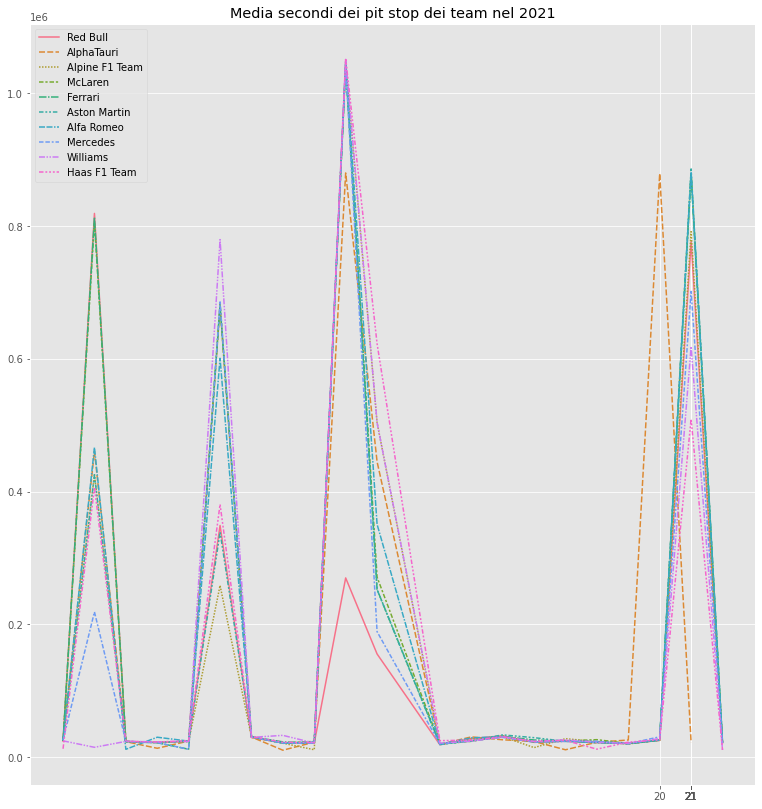

In [ ]:
#unione di races e pit_stop in un dataframe pit_stop_mean
pit_stop_mean = pd.merge(races,pit_stops,on='raceId').drop(columns=['circuitId','name','date','time_x','url'])
#selezione delle gare dell'anno 2021
pit_stop_mean = pit_stop_mean[pit_stop_mean.year == 2021]
#trasformiamo i millisecondi in secondi
for millisecond in pit_stop_mean['milliseconds']:
  pit_stop_mean.loc['milliseconds'] =  pit_stop_mean['milliseconds']/1000
#eliminiamo colonne che non ci serviranno
pit_stop_mean.drop(columns=['duration','time_y'],inplace=True)
#rinominiamo le colonne
pit_stop_mean.rename({'milliseconds':'seconds'},axis = 1, inplace=True)
#unione di pit_stop_mean e results per ottenere il constructorId
pit_stop_mean = pd.merge(pit_stop_mean,results,on=['raceId','driverId'])
#eliminazione di colonne inutili
pit_stop_mean.drop(columns=['resultId', 'number', 'grid', 'position','positionText', 'positionOrder', 'points', 'laps', 'time','milliseconds', 'fastestLap', 'rank', 'fastestLapTime','fastestLapSpeed', 'statusId'],inplace=True)
#ordiniamo i valori per numero di gara e giro in cui i piloti hanno effettuato il pit stop
pit_stop_mean.sort_values(['round','lap'],inplace=True)
#unione di pit_stop_mean e constructor per ottenere il nome del team
pit_stop_mean = pd.merge(pit_stop_mean,constructors,on='constructorId')
#eliminazione di colonne inutili
pit_stop_mean.drop(columns=['constructorId','constructorRef','nationality','url'],inplace=True)
#lista dove salveremo i risultati della funzione calcola_media
lista = []
x = 0
#otteniamo i nomi dei team
insieme_team =  pit_stop_mean['name'].unique()
round = pit_stop_mean['round'].unique()
#per ogni team calcoliamo il tempo medio dei pit stop pe ogni gara
for team in pit_stop_mean['name'].unique():
  lista.append(calcola_media(team,pit_stop_mean))


mean = pd.DataFrame(lista,insieme_team,round)
mean = mean.T
mean = mean.round(2)
print(mean)
#settiamo la dimensione del grafico
plt.figure(figsize=(13,14))

#disegniamo il grafico
sns.lineplot(data=mean)
  
plt.xticks(mean.count())
#inseriamo titolo
plt.title('Media secondi dei pit stop dei team nel 2021')
#salviamo il grafico
plt.savefig('media_pit_stop_2021',dpi=300)
#mostriamo il grafico
plt.show()


# **Tabella drivers**

# Analisi dei dati

In [ ]:
#visualizzazione dei dati
print(drivers)

#visualizza colonne
print(drivers.columns)

#conteggio dei dati
drivers.count()

     driverId  ...                                             url
0           1  ...     http://en.wikipedia.org/wiki/Lewis_Hamilton
1           2  ...      http://en.wikipedia.org/wiki/Nick_Heidfeld
2           3  ...       http://en.wikipedia.org/wiki/Nico_Rosberg
3           4  ...    http://en.wikipedia.org/wiki/Fernando_Alonso
4           5  ...  http://en.wikipedia.org/wiki/Heikki_Kovalainen
..        ...  ...                                             ...
849       851  ...        http://en.wikipedia.org/wiki/Jack_Aitken
850       852  ...       http://en.wikipedia.org/wiki/Yuki_Tsunoda
851       853  ...     http://en.wikipedia.org/wiki/Nikita_Mazepin
852       854  ...    http://en.wikipedia.org/wiki/Mick_Schumacher
853       855  ...       https://en.wikipedia.org/wiki/Guanyu_Zhou

[854 rows x 9 columns]
Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')


driverId       854
driverRef      854
number         854
code           854
forename       854
surname        854
dob            854
nationality    854
url            854
dtype: int64

# Relazioni tra i dati

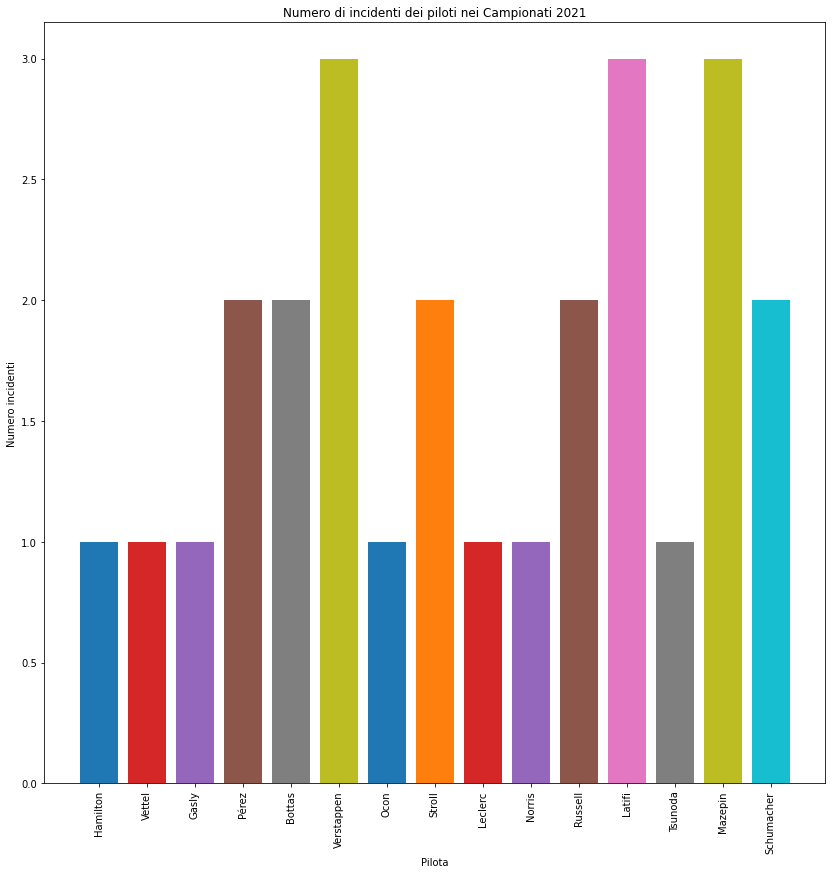

In [ ]:
#unione di drivers e results in un dataframe dangerous_drivers
dangerous_drivers = pd.merge(drivers,results,on='driverId')
#eliminazione colonne non utili
dangerous_drivers.drop(['number_x','code','driverRef','forename','dob','nationality','url','resultId','constructorId','number_y','grid','position','positionText','positionOrder','points','laps','time','milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed'],axis= 1,inplace=True)
#unione dangerous_drivers e races
dangerous_drivers = pd.merge(dangerous_drivers,races,on='raceId')
#selezione delle sole gare dei Campionati 2020 e 2021
dangerous_drivers = dangerous_drivers[dangerous_drivers['year'] == 2021]
dangerous_drivers
#settiamo la dimensione della figura
plt.figure(figsize=(14,14))
#plottiamo i dati
for driver in dangerous_drivers['driverId'].unique():
  i = dangerous_drivers[(dangerous_drivers['driverId'] == driver) & ((dangerous_drivers['statusId'] == 3) | (dangerous_drivers['statusId'] == 4))]
  plt.bar(i['surname'],i['statusId'].count())


#assegniamo un titolo al grafico
plt.title('Numero di incidenti dei piloti nei Campionati 2021')
#assegniamo una label all'asse delle x
plt.xlabel('Pilota')
#assegniamo una label all'asse delle y
plt.ylabel('Numero incidenti')
#rotiamo gli identificativi delle barre
plt.xticks(rotation = 90)
#salviamo il grafico
plt.savefig('incidenti_piloti',dpi=300)
#mostriamo il grafico
plt.show()


# **Tabella seasons**

# Analisi dei dati

In [ ]:
#visualizzazione dei dati
print(seasons)

#visualizza colonne
print(seasons.columns)

#conteggio dei dati
seasons.count()

    year                                                url
0   2009  https://en.wikipedia.org/wiki/2009_Formula_One...
1   2008  https://en.wikipedia.org/wiki/2008_Formula_One...
2   2007  https://en.wikipedia.org/wiki/2007_Formula_One...
3   2006  https://en.wikipedia.org/wiki/2006_Formula_One...
4   2005  https://en.wikipedia.org/wiki/2005_Formula_One...
..   ...                                                ...
68  2018  https://en.wikipedia.org/wiki/2018_Formula_One...
69  2019  https://en.wikipedia.org/wiki/2019_Formula_One...
70  2020  https://en.wikipedia.org/wiki/2020_Formula_One...
71  2021  https://en.wikipedia.org/wiki/2021_Formula_One...
72  2022  https://en.wikipedia.org/wiki/2022_Formula_One...

[73 rows x 2 columns]
Index(['year', 'url'], dtype='object')


year    73
url     73
dtype: int64

# **Tabella status**

# Analisi dei dati

In [ ]:
#visualizzazione dei dati
print(status)

#visualizza colonne
print(status.columns)

#conteggio dei dati
status.count()

     statusId        status
0           1      Finished
1           2  Disqualified
2           3      Accident
3           4     Collision
4           5        Engine
..        ...           ...
132       135    Brake duct
133       136          Seat
134       137        Damage
135       138        Debris
136       139       Illness

[137 rows x 2 columns]
Index(['statusId', 'status'], dtype='object')


statusId    137
status      137
dtype: int64